In [95]:
import pandas as pd
import numpy as np

In [96]:
data_electricity = pd.read_csv("C:/Users/91971/Downloads/15647NeonBand.RarZipExtractorPro_g3b9h1p9bdemw!App/Rar Zip Extractor Pro/13. Capstone Case Study - Demand Estimation/Electricity Consumption.csv")

In [97]:
data_electricity 

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [98]:
data_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [99]:
#converting date into datetime
data_electricity['DATE'] = pd.to_datetime(data_electricity.DATE)

In [100]:
data_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [101]:
data_electricity

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


In [102]:
#set Date as the index
data_electricity.set_index(data_electricity.DATE,inplace = True)

In [103]:
data_electricity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


<AxesSubplot:xlabel='DATE'>

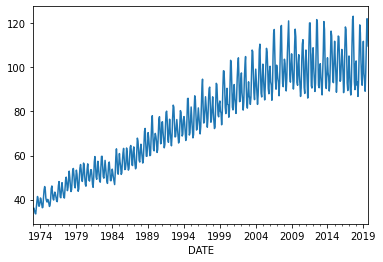

In [104]:
#electricity consumption graph
import matplotlib.pyplot as plt
%matplotlib inline
data_electricity.Electricty_Consumption_in_TW.plot()

In [105]:
#extracting data
data_electricity['year'] = data_electricity.DATE.dt.year
data_electricity['month'] =data_electricity.DATE.dt.month

In [106]:
data_electricity

,DATE,Electricty_Consumption_in_TW,year,month
DATE,,,,
1973-01-01,1973-01-01,35.9728,1973,1
1973-02-01,1973-02-01,36.1334,1973,2
1973-03-01,1973-03-01,35.0625,1973,3
1973-04-01,1973-04-01,33.8416,1973,4
1973-05-01,1973-05-01,33.5107,1973,5
...,...,...,...,...
2019-05-01,2019-05-01,97.5860,2019,5
2019-06-01,2019-06-01,110.8580,2019,6
2019-07-01,2019-07-01,122.1014,2019,7


<AxesSubplot:xlabel='year'>

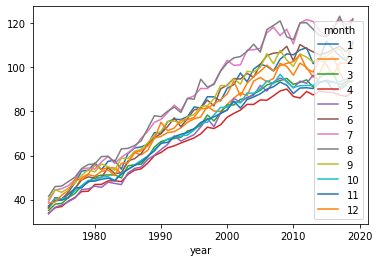

In [107]:
#pivot table showing the month wise date for different year
pd.pivot_table(data = data_electricity , index = 'year' , columns = 'month' , values = 'Electricty_Consumption_in_TW').plot()

<AxesSubplot:xlabel='month'>

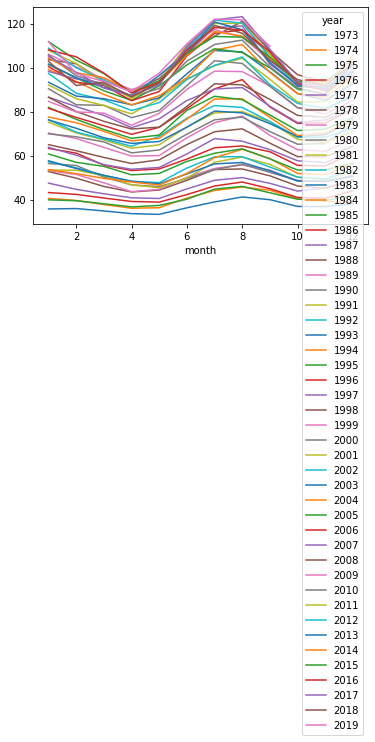

In [108]:
#pivot table showing the year wise date for different month
pd.pivot_table(data = data_electricity , index = 'month' , columns = 'year' , values = 'Electricty_Consumption_in_TW').plot()

In [109]:
#seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [110]:
seasonal_decompose(data_electricity.Electricty_Consumption_in_TW)

In [111]:
sd = seasonal_decompose(data_electricity.Electricty_Consumption_in_TW, model =
                  'additive')

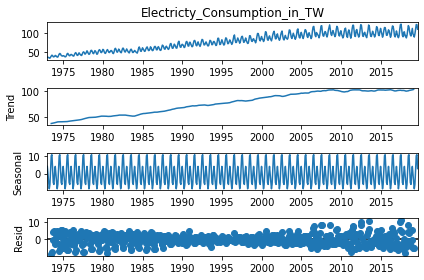

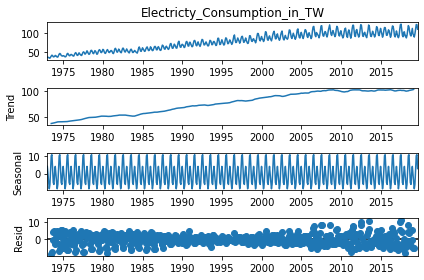

In [112]:
#first = original time series
sd.plot()

In [113]:
sd.trend.head(10)

DATE
1973-01-01          NaN
1973-02-01          NaN
1973-03-01          NaN
1973-04-01          NaN
1973-05-01          NaN
1973-06-01          NaN
1973-07-01    37.223388
1973-08-01    37.576442
1973-09-01    37.850562
1973-10-01    38.072942
Name: trend, dtype: float64

In [114]:
#for 12 months
sd.seasonal.head(12)

DATE
1973-01-01     4.135755
1973-02-01    -0.705922
1973-03-01    -4.489678
1973-04-01    -8.668415
1973-05-01    -6.044817
1973-06-01     2.943116
1973-07-01    10.277826
1973-08-01    10.828421
1973-09-01     2.891998
1973-10-01    -5.105992
1973-11-01    -6.171314
1973-12-01     0.109021
Name: seasonal, dtype: float64

In [115]:
decomposition_output  = pd.concat([sd.observed,sd.trend,sd.seasonal,sd.resid], axis = 1).head(24)

In [116]:
decomposition_output 

,Electricty_Consumption_in_TW,trend,seasonal,resid
DATE,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


In [117]:
#checking auto corelation and pacf
from statsmodels.tsa.stattools import acf,pacf_ols

In [118]:
acf(data_electricity.Electricty_Consumption_in_TW, nlags = 24)

array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636])

In [119]:
pacf_ols(data_electricity.Electricty_Consumption_in_TW, nlags = 24)

array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ])

In [120]:
import statsmodels.tsa.api as smt

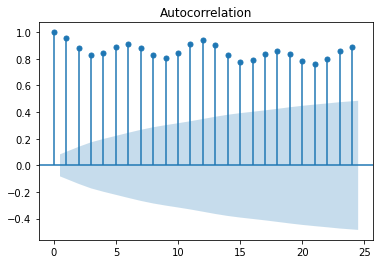

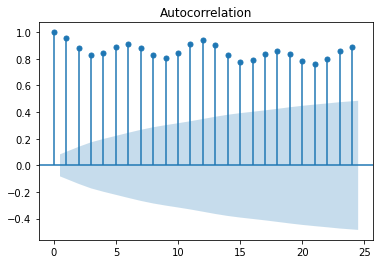

In [121]:
smt.graphics.plot_acf(data_electricity.Electricty_Consumption_in_TW , lags = 24)

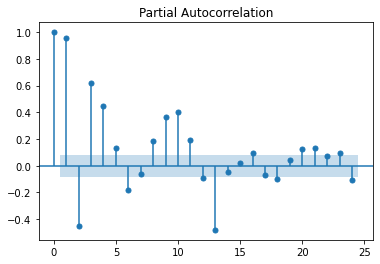

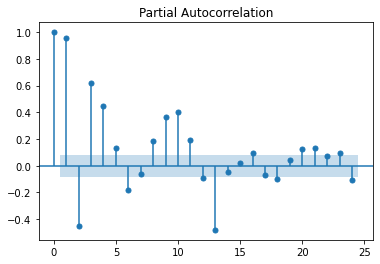

In [122]:
smt.graphics.plot_pacf(data_electricity.Electricty_Consumption_in_TW , lags = 24)

In [123]:
# see wheather series is stationary or not by ADF test
# p value low - series is stationary and vice versa
from statsmodels.tsa.stattools import adfuller


In [124]:
#adfuller?

In [125]:
adfuller(data_electricity.Electricty_Consumption_in_TW )
#as p value is very high we can say that series is not stationary

(-1.7405933729832426,
 0.4103281604468688,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.4096631180428)

In [126]:
#adfuller(data_electricity.Electricty_Consumption_in_TW.diff(1).dropna())

In [127]:
#adfuller(data_electricity.Electricty_Consumption_in_TW.diff(2).dropna())

In [128]:
adfuller(np.log(data_electricity.Electricty_Consumption_in_TW).diff(1).dropna())

(-6.884809722917884,
 1.4034181751308887e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [129]:
#getting p value is this case less than 0.05

<AxesSubplot:xlabel='DATE'>

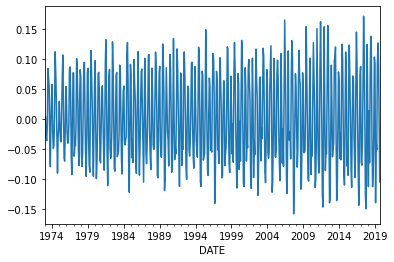

In [130]:
np.log(data_electricity.Electricty_Consumption_in_TW).diff(1).plot()

In [131]:
# how to convert non stationary series into stationary series -- apply log trans or difference transaformation
adfuller(np.log(data_electricity.Electricty_Consumption_in_TW ))
#we can see the p value is significantly reduced -- but not that much so try diff

(-3.0018666788915938,
 0.03472044330065342,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.663511859698)

<AxesSubplot:xlabel='DATE'>

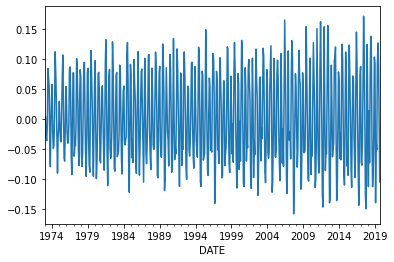

In [132]:
np.log(data_electricity.Electricty_Consumption_in_TW).diff(1).plot()

<AxesSubplot:xlabel='DATE'>

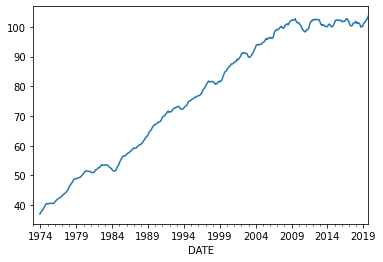

In [133]:
data_electricity.Electricty_Consumption_in_TW.rolling(window=12).mean().plot()

In [134]:
#ETS model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [135]:
ets = ExponentialSmoothing(data_electricity.Electricty_Consumption_in_TW,trend = 'mul', seasonal = 'mul',seasonal_periods = 12)

In [136]:
ets = ets.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
#these 3 are alpha beta gamma simultaneously

In [137]:
ets.forecast(steps=12)

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
Freq: MS, dtype: float64

In [138]:
print(ets.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                     ExponentialSmoothing   SSE                           3675.183
Optimized:                                 True   AIC                           1086.477
Trend:                           Multiplicative   BIC                           1155.752
Seasonal:                        Multiplicative   AICC                          1087.739
Seasonal Periods:                            12   Date:                 Sat, 25 Dec 2021
Box-Cox:                                  False   Time:                         19:02:02
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.100

In [139]:

# now how to validate the forecasting model

In [146]:
#divide the data
data_electricity.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [147]:
data_electricity.Electricty_Consumption_in_TW['2019-01-01':]

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [148]:
#split the data into train and test
train = data_electricity.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']
test = data_electricity.Electricty_Consumption_in_TW['2019-01-01':]
#most recent information we can use as test data

In [149]:
ets_1 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
ets_1 = ets_1.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)

In [150]:
fct = ets_1.forecast(steps=6)
fct 

2019-01-01    103.726844
2019-02-01     96.785745
2019-03-01     92.966152
2019-04-01     87.348848
2019-05-01     93.286194
2019-06-01    107.753086
Freq: MS, dtype: float64

In [152]:
#calculating error and % of error
np.mean(abs(test - fct)/test)
# 3% error - very low error

0.03003259887366261

In [153]:
#check in train data,if the value is valid or not
ets_1.fittedvalues['2018-01-01':]

DATE
2018-01-01    109.742855
2018-02-01    103.123267
2018-03-01     95.964840
2018-04-01     89.390323
2018-05-01     93.847428
2018-06-01    107.296341
2018-07-01    116.985199
2018-08-01    116.124662
2018-09-01    103.114160
2018-10-01     89.896410
2018-11-01     88.080718
2018-12-01     97.992857
dtype: float64

In [154]:
train['2018-01-01':] 

DATE
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, dtype: float64

In [155]:
np.mean(abs(train['2018-01-01':] - ets_1.fittedvalues['2018-01-01':])/train['2018-01-01':])
# approx 3% error

0.03411381972487355

In [157]:
#checking best model with different values of alpha,beta and gamma
for alpha in [0.1,0.2,0.3,0.4,0.5]:
    for beta in [0.1,0.2,0.3,0.4,0.5]:
        for gamma in [0.1,0.2,0.3,0.4,0.5]:
            ets_2 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
            ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
            fct = ets_2.forecast(steps=6)
            print('alpha:', alpha,'beta:', beta,'gamma:', gamma)
            print('MAPE',np.mean(np.abs(test - fct)/test))

alpha: 0.1 beta: 0.1 gamma: 0.1
MAPE 0.026703209242565532
alpha: 0.1 beta: 0.1 gamma: 0.2
MAPE 0.0277038043313324
alpha: 0.1 beta: 0.1 gamma: 0.3
MAPE 0.028434888845023484
alpha: 0.1 beta: 0.1 gamma: 0.4
MAPE 0.031280544998507964
alpha: 0.1 beta: 0.1 gamma: 0.5
MAPE 0.03498484061740715
alpha: 0.1 beta: 0.2 gamma: 0.1
MAPE 0.025187071623263186
alpha: 0.1 beta: 0.2 gamma: 0.2
MAPE 0.025985808796027226
alpha: 0.1 beta: 0.2 gamma: 0.3
MAPE 0.027450200122652615
alpha: 0.1 beta: 0.2 gamma: 0.4
MAPE 0.031679524876358764
alpha: 0.1 beta: 0.2 gamma: 0.5
MAPE 0.03708696085319216
alpha: 0.1 beta: 0.3 gamma: 0.1
MAPE 0.024518590225998508
alpha: 0.1 beta: 0.3 gamma: 0.2
MAPE 0.02594763797033313
alpha: 0.1 beta: 0.3 gamma: 0.3
MAPE 0.028943645338953276
alpha: 0.1 beta: 0.3 gamma: 0.4
MAPE 0.034648059940874006
alpha: 0.1 beta: 0.3 gamma: 0.5
MAPE 0.041851163089471954
alpha: 0.1 beta: 0.4 gamma: 0.1
MAPE 0.02527228208815202
alpha: 0.1 beta: 0.4 gamma: 0.2
MAPE 0.027746669207507207
alpha: 0.1 beta: 0.4

In [158]:
#checking best model with different values of alpha,beta and gamma
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [159]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [160]:
auto_hwm(data_electricity.Electricty_Consumption_in_TW, val_split_date ='2018-12-01', alpha=alpha, beta=beta, gamma=gamma, 
              trend='add', seasonal='add', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking f

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}
Checking f

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.7}
Checking f

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6}
Checking f

{'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2, 'mae': array(0.01376865)}

In [165]:
ets_2 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
ets_2 = ets_2.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
fct = ets_2.forecast(steps=6)

In [161]:
ets_2 = ExponentialSmoothing(data_electricity.Electricty_Consumption_in_TW,trend = 'add', seasonal = 'add',seasonal_periods = 12)
ets_2 = ets_2.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
fct = ets_2.forecast(steps=6)

In [171]:
ets_2.fittedvalues['2018-01-01':]

DATE
2018-01-01    109.742855
2018-02-01    103.123267
2018-03-01     95.964840
2018-04-01     89.390323
2018-05-01     93.847428
2018-06-01    107.296341
2018-07-01    116.985199
2018-08-01    116.124662
2018-09-01    103.114160
2018-10-01     89.896410
2018-11-01     88.080718
2018-12-01     97.992857
dtype: float64

In [172]:
fct

2019-01-01    103.726844
2019-02-01     96.785745
2019-03-01     92.966152
2019-04-01     87.348848
2019-05-01     93.286194
2019-06-01    107.753086
Freq: MS, dtype: float64

In [173]:
print('test error',np.mean(abs(test - fct)/test))
#test error is very low

test error 0.03003259887366261


In [174]:
print('train error',np.mean(abs(train['2018-01-01':] - ets_1.fittedvalues['2018-01-01':])/train['2018-01-01':]))
#train error is very low

train error 0.03411381972487355


In [63]:
#ARIMA/SARIMA/ARIMAX
# FINDING THE SERIES IS ARIMAX OR SARIMAX
# finding the values of(p,d,q) and (P,D,Q,T)
# X Variables

In [175]:
#split the data into train and test
train = data_electricity.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']
test = data_electricity.Electricty_Consumption_in_TW['2019-01-01':]

In [176]:
adfuller(np.log(data_electricity.Electricty_Consumption_in_TW).diff(1).dropna())

(-6.884809722917884,
 1.4034181751308887e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [177]:
yt = np.log(data_electricity.Electricty_Consumption_in_TW).diff(1).dropna()
yt

DATE
1973-02-01    0.004455
1973-03-01   -0.030085
1973-04-01   -0.035441
1973-05-01   -0.009826
1973-06-01    0.084962
                ...   
2019-05-01    0.089995
2019-06-01    0.127516
2019-07-01    0.096602
2019-08-01   -0.002664
2019-09-01   -0.104265
Name: Electricty_Consumption_in_TW, Length: 560, dtype: float64

In [178]:
# input for ARIMA model should be stationary series
ln_sales = np.log(data_electricity.Electricty_Consumption_in_TW)
# d = 1 explicitly

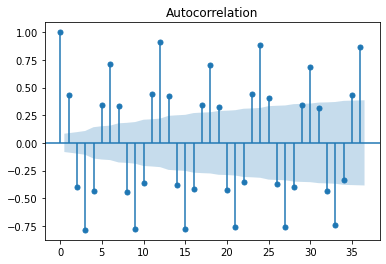

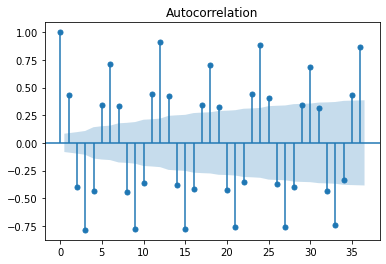

In [179]:
smt.graphics.plot_acf(yt,lags = 36)
# we can see that in every 12 months patterns are repeating - so it has seasonality - it is SARIMA
# q = after which lag,the value of autocorelation becomes zero or crossing zero-- here we can see after lag 1 is becoming zero


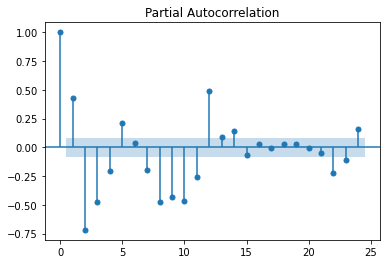

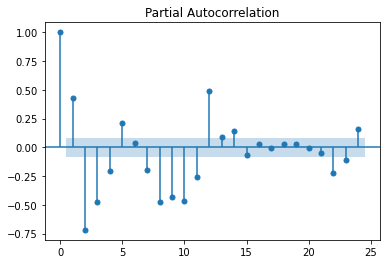

In [180]:
smt.graphics.plot_pacf(yt,lags = 24,method = 'ols')
# p = after which lag,the value of partial autocorelation becomes zero or crossing zero-- here we can see after lag 1 is becoming zero

In [181]:
# it is a SARIMA model
# Series = ln_sales
#(p,d,q) = (1,1,1)
#(P,D,Q,T) = (1,0,1,12)-- capital P Q value can be same as small ones
#second method to calculate - Iterative process
#p =(0,1,2),q = (0,1,2),P = (0,1,2),Q = (0,1,2), D = (0,1)
#no. of combinations = 3*3*3*3*3*3 = 800 combinations

In [182]:

#split the data into train and test
train = data_electricity.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']
test = data_electricity.Electricty_Consumption_in_TW['2019-01-01':]

In [183]:
#build a mpdel based on Box - Jenkins process
#order = small p d q
# seasonal order = capital P D Q
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order = (1,0,1,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility = False).fit()

In [184]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1064.630
Date:                            Sat, 25 Dec 2021   AIC                           2139.259
Time:                                    19:39:12   BIC                           2160.689
Sample:                                01-01-1973   HQIC                          2147.643
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5905      0.045     12.991      0.000       0.501       0.680
ma.L1         -0.9107      0.026   

In [185]:
#log form
fct = model.forecast(steps=6)

In [186]:
fct

2019-01-01    107.173271
2019-02-01     98.873890
2019-03-01     93.836583
2019-04-01     86.994591
2019-05-01     92.992045
2019-06-01    108.557369
Freq: MS, Name: predicted_mean, dtype: float64

In [188]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [189]:
acp = np.exp(test)
acp

DATE
2019-01-01    3.773170e+48
2019-02-01    1.854335e+42
2019-03-01    5.681392e+40
2019-04-01    5.414424e+38
2019-05-01    2.404702e+42
2019-06-01    1.396425e+48
2019-07-01    1.066508e+53
2019-08-01    7.706585e+52
2019-09-01    4.470502e+47
Name: Electricty_Consumption_in_TW, dtype: float64

In [190]:
# error of test accuracy is very low
np.mean(abs(test - fct)/test)

0.02503165650737849

In [191]:
import statsmodels.api as sm

model_1 = sm.tsa.statespace.SARIMAX(ln_sales, order = (1,1,1), seasonal_order = (1,0,1,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility = False).fit()

In [192]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1064.630
Date:                            Sat, 25 Dec 2021   AIC                           2139.259
Time:                                    19:41:05   BIC                           2160.689
Sample:                                01-01-1973   HQIC                          2147.643
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5905      0.045     12.991      0.000       0.501       0.680
ma.L1         -0.9107      0.026   

In [193]:
fct_2  = np.exp(model_1.forecast(steps=36))
fct_2

2019-10-01     96.391239
2019-11-01     93.769330
2019-12-01    103.838920
2020-01-01    109.987266
2020-02-01    100.752447
2020-03-01     96.224934
2020-04-01     90.030851
2020-05-01     96.327849
2020-06-01    111.116108
2020-07-01    122.770783
2020-08-01    121.948620
2020-09-01    108.896823
2020-10-01     96.111996
2020-11-01     93.799940
2020-12-01    104.173067
2021-01-01    110.532356
2021-02-01    101.264101
2021-03-01     96.726556
2021-04-01     90.481105
2021-05-01     96.877251
2021-06-01    111.884320
2021-07-01    123.722256
2021-08-01    122.892571
2021-09-01    109.647724
2021-10-01     96.683996
2021-11-01     94.341544
2021-12-01    104.859159
2022-01-01    111.311102
2022-02-01    101.909583
2022-03-01     97.309169
2022-04-01     90.979781
2022-05-01     97.462062
2022-06-01    112.683645
2022-07-01    124.701934
2022-08-01    123.859328
2022-09-01    110.414082
Freq: MS, Name: predicted_mean, dtype: float64

In [194]:
p = [0,1,2];q = [0,1,2];d = [2];P = [0,1,2];Q = [0,1,2];D = [0,1]

In [195]:
import itertools
list(itertools.product(p, d, q))

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [196]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [197]:
#calculating best results considering different values
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [198]:
best_results = auto_arima(ln_sales,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-1238.511012334182
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-1556.8995683958988
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-1641.3644947094945
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-1934.70974857202
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-2121.0638450897454
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-2075.2625719412013
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-1967.9124196110963
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-2174.470991405767
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-2121.6305156000026
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-1982.0537672234154
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-2116.1111875432302
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-2075.004924607565
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-1989.6730558404386
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-2123.2594484040646
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-2122.9092501129435
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-2006.7872743828193
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-2082.1612025293875
SA

SARIMAX(2, 2, 1)x(2, 0, 2, 12)12 - AIC:-2564.6443662332968
SARIMAX(2, 2, 1)x(2, 1, 0, 12)12 - AIC:-2447.3431074464334
SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:-2511.1669997906747
SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:-2514.2919766303007
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:-1960.4494029410162
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-2121.5567711123495
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:-2130.1564489205875
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:-2429.8829173719414
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:-2582.8126153003914
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:-2495.918782944075
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-2444.4391758357087
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-2640.538845561001
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-2572.8703242356087
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-2436.5820147661216
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-2536.127038274889
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:-2516.825287444948
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-2458.165779730417
SA

In [199]:
#rerun the model with best values
model = sm.tsa.statespace.SARIMAX(ln_sales,
                                      order=(2, 2, 2),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

In [200]:
f_cast = np.exp(model.forecast(steps = 36))
f_cast

2019-10-01     96.485514
2019-11-01     93.763602
2019-12-01    103.992373
2020-01-01    110.370749
2020-02-01    101.057951
2020-03-01     96.534110
2020-04-01     90.268311
2020-05-01     96.639043
2020-06-01    111.580595
2020-07-01    123.351461
2020-08-01    122.447912
2020-09-01    109.203796
2020-10-01     96.251953
2020-11-01     93.845116
2020-12-01    104.301229
2021-01-01    110.742850
2021-02-01    101.279132
2021-03-01     96.683736
2021-04-01     90.342981
2021-05-01     96.774604
2021-06-01    111.879750
2021-07-01    123.788592
2021-08-01    122.863392
2021-09-01    109.448192
2021-10-01     96.345759
2021-11-01     93.906773
2021-12-01    104.464494
2022-01-01    110.969434
2022-02-01    101.393452
2022-03-01     96.743059
2022-04-01     90.333819
2022-05-01     96.819236
2022-06-01    112.074227
2022-07-01    124.111114
2022-08-01    123.164942
2022-09-01    109.589435
Freq: MS, Name: predicted_mean, dtype: float64

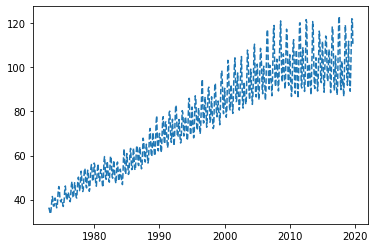

In [201]:
import matplotlib.pyplot as plt
plt.plot(data_electricity.Electricty_Consumption_in_TW,'--',label = 'obs')
#plt.plot(f_cast,'-',label=f_cast)

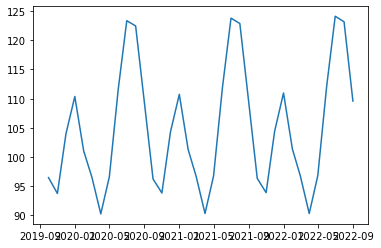

In [202]:
plt.plot(f_cast,'-',label=f_cast)

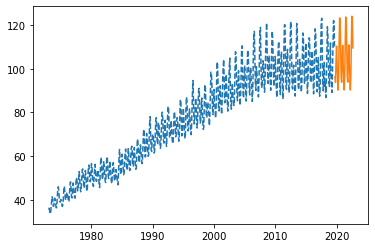

In [203]:
#running both together
plt.plot(data_electricity.Electricty_Consumption_in_TW,'--',label = 'obs')
plt.plot(f_cast,'-',label=f_cast)
#orange part showing the future values

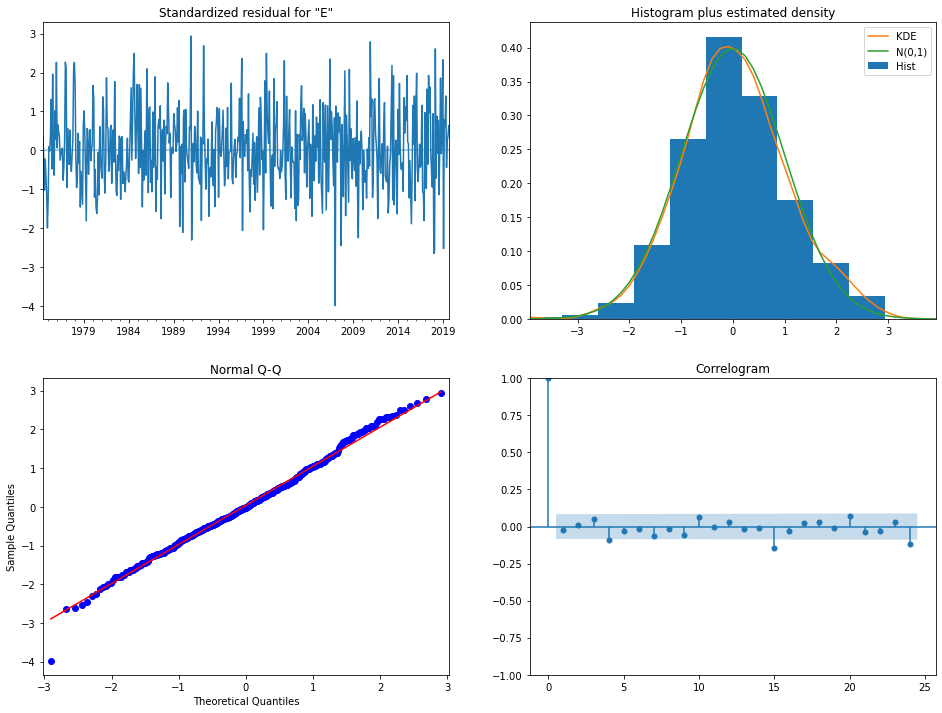

In [204]:
model.plot_diagnostics(lags = 24,figsize=(16,12))
plt.show()

In [ ]:
#We chose SARIMA model because of Seasonality present and as above graphs,like Histogram follows normal distribution which means-

#Future predicted values are correct.